In [7]:
!pip install pandas

In [8]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=6beb2d3041009496099cb0d5f6bebfb42ac403c2bbb18b01db48f026387d44c5
  Stored in directory: /Users/shashank/Library/Caches/pip/wheels/15/0c/b3/674aea8c5d91c642c817d4d630bd58faa316724b136844094d
Successfully built utils


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [13]:
# load the dataset
x_train, y_train = load_data()

In [14]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


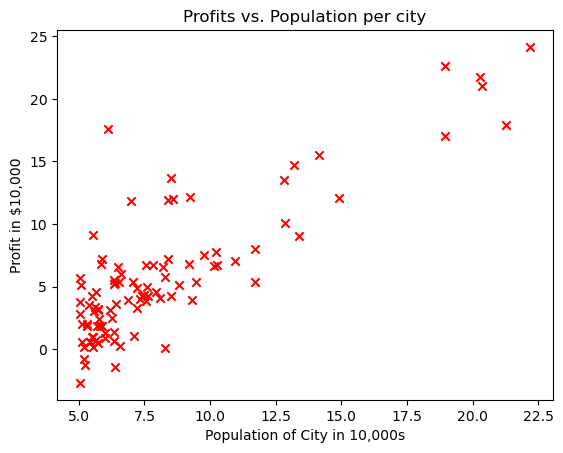

In [15]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [16]:
# UNQ_C1
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    print(m)
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###
    for i in range(m):
        model = w * x[i] + b
        squared_error = (model - y[i]) *(model -y[i])
        total_cost = total_cost + squared_error
        model = 0
        squared_error = 0
        
    total_cost = total_cost / (2*m)
    
    ### END CODE HERE ### 

    return total_cost

In [19]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')


97
<class 'numpy.float64'>
Cost at initial w: 75.203


In [20]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    
    for i in range(m):
        model = w*x[i] + b
        dw = (model - y[i]) * x[i] / m
        db = (model - y[i]) / m
        dj_dw = dj_dw + dw
        dj_db = dj_db +db
        dw = 0
        db = 0
        model = 0 
    
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [22]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393


In [23]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114434 -4.007175051546393


In [24]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [25]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

97
Iteration    0: Cost     6.74   
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
Iteration  150: Cost     5.31   
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
97
Iteration  300: Cost     4.96  

In [26]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

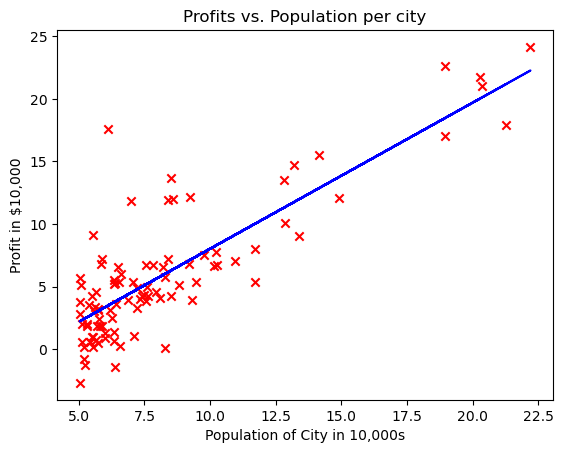

In [27]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

In [28]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
